In [1]:
import pandas as pd
import numpy as np
from utils import *
import pytensor.tensor as pt  # Import PyTensor (Theano backend)

import matplotlib.pyplot as plt

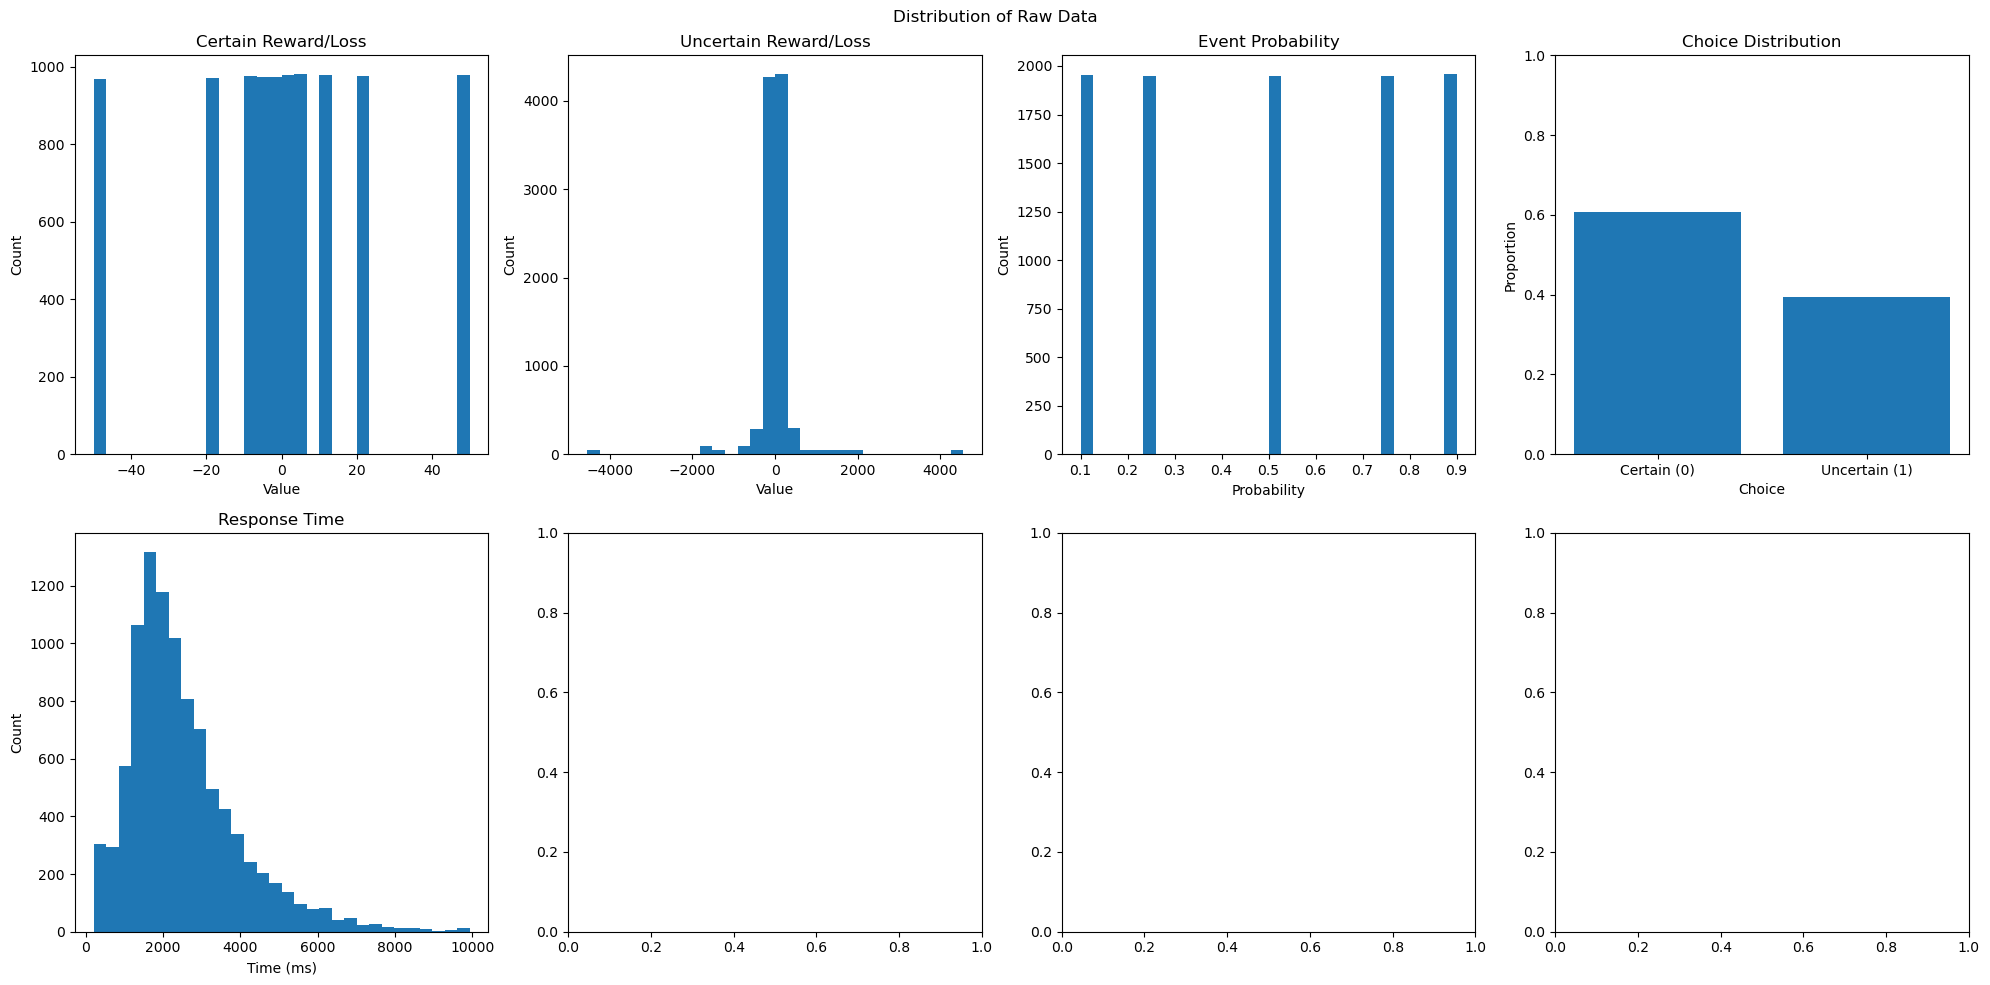

In [2]:
# Read in the raw data
df, _ = read_dd_data('../data/PD_data', standardize=False, reduced_data=False)
plot_data_distributions(df)


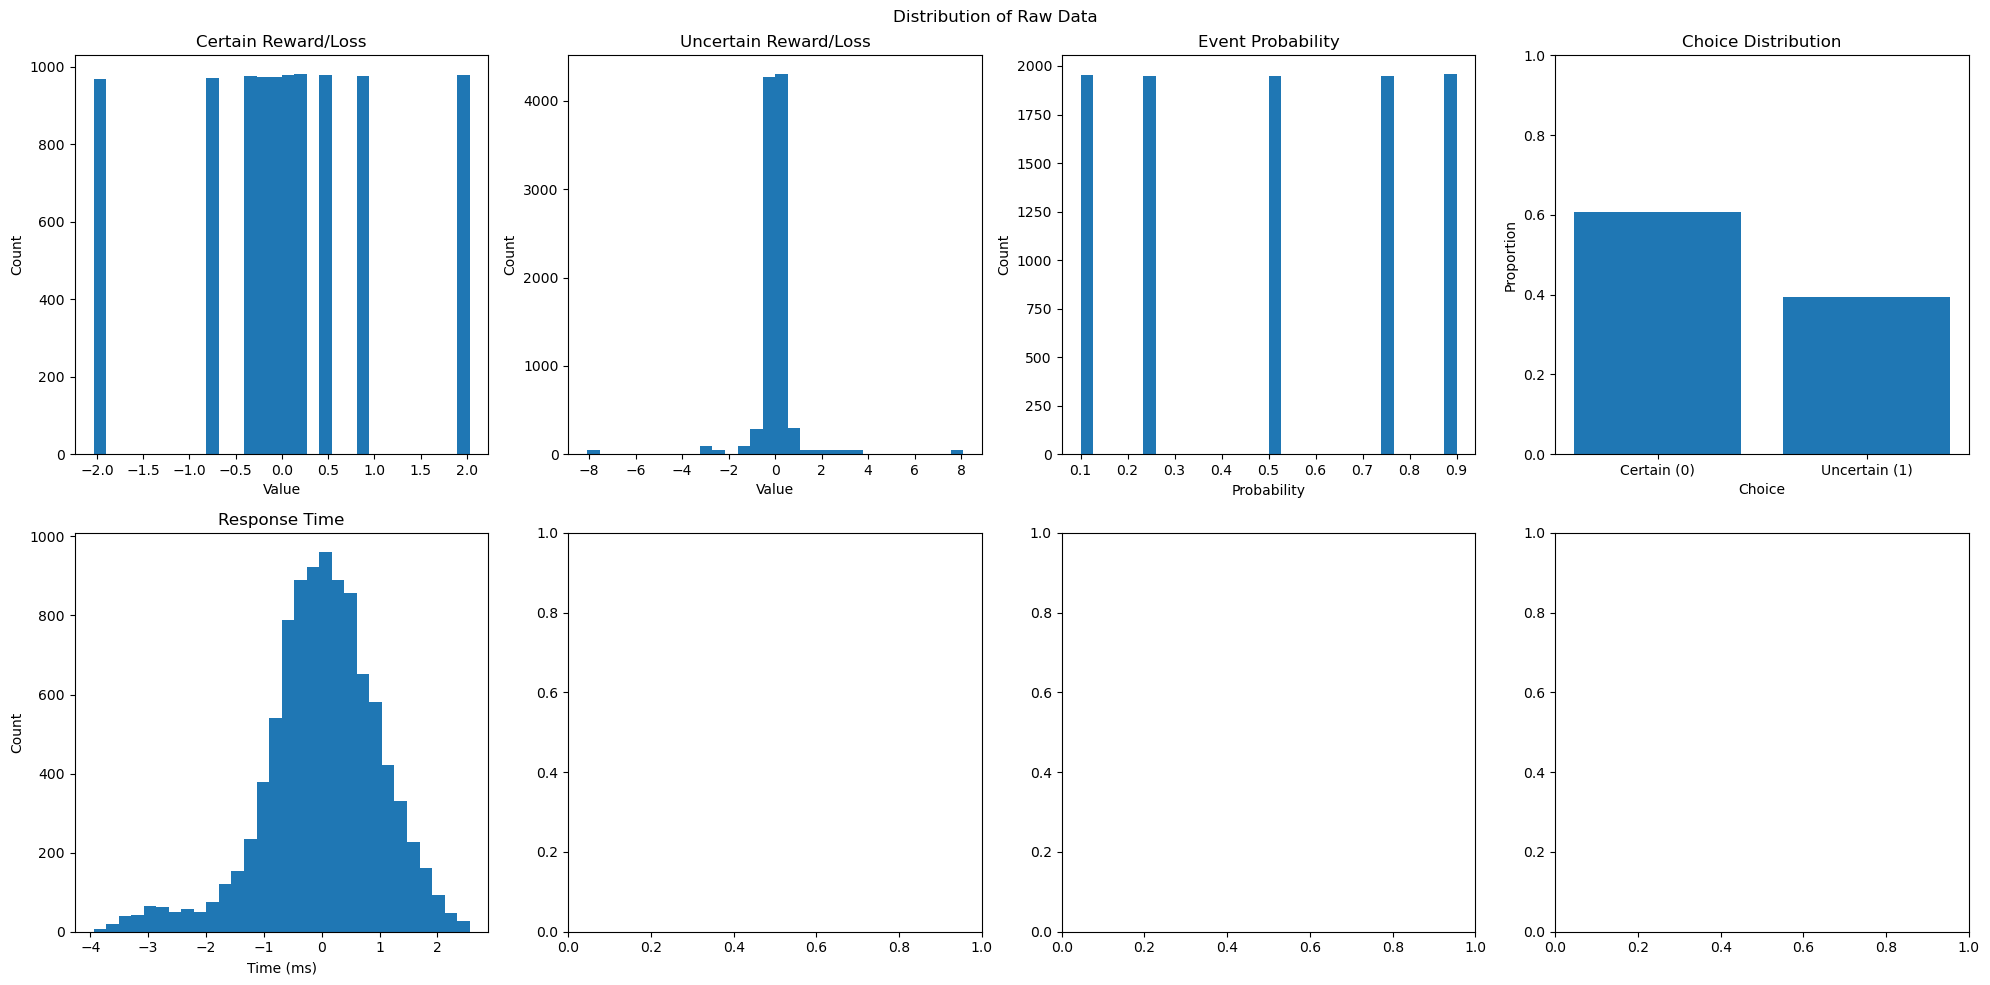

In [3]:
# Read in the raw data
df, _ = read_dd_data('../data/PD_data', standardize=True, reduced_data=False)
plot_data_distributions(df)


Number of participants: 49
Average trials per participant: 198.96
Min trials: 192
Max trials: 200


<Axes: >

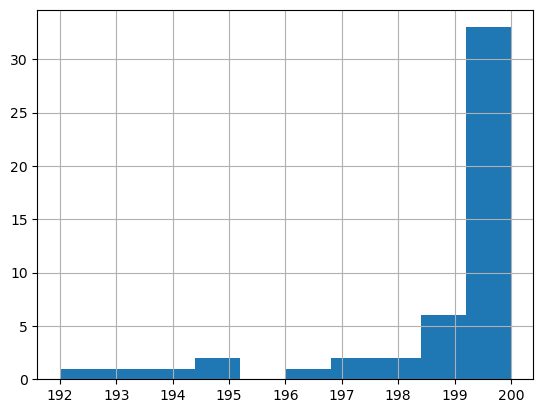

In [4]:
# print number of participants
print(f"Number of participants: {df['participant'].nunique()}")

# Calculate trials per participant
trials_per_participant = df.groupby('participant').size()
print(f"Average trials per participant: {trials_per_participant.mean():.2f}")
print(f"Min trials: {trials_per_participant.min()}")
print(f"Max trials: {trials_per_participant.max()}")

trials_per_participant.hist()

In [6]:
# Load the saved trace
trace = az.from_netcdf("models/linear_model.nc")
trace = trace.posterior

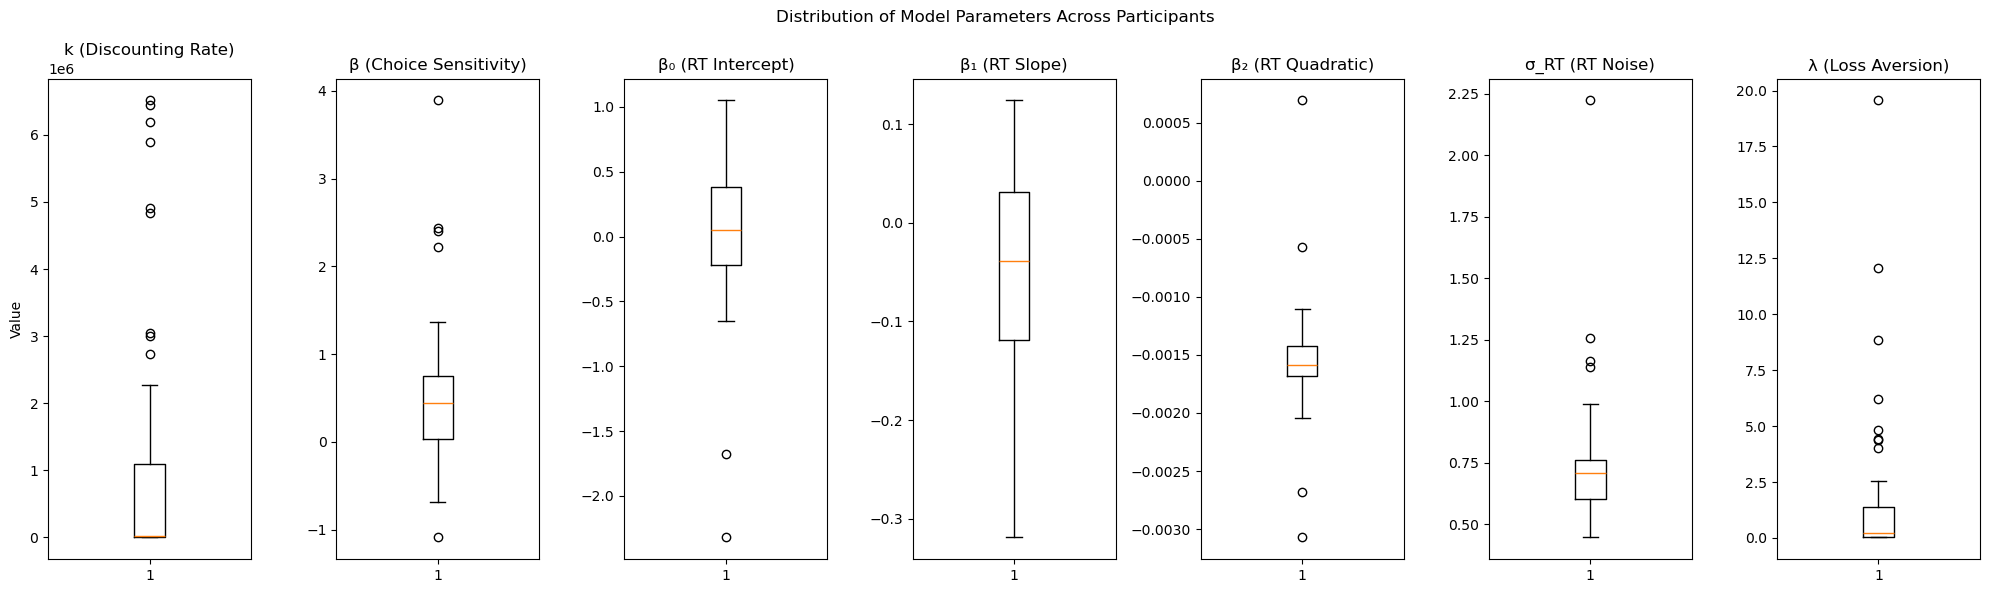

In [7]:
# Extract k values for all participants across chains and draws
k_values = trace.k.median(dim=['chain', 'draw']).values
beta_values = trace.beta.median(dim=['chain', 'draw']).values
beta0_values = trace.beta0.median(dim=['chain', 'draw']).values
beta1_values = trace.beta1.median(dim=['chain', 'draw']).values
beta2_values = trace.beta2.median(dim=['chain', 'draw']).values
sigma_RT_values = trace.sigma_RT.median(dim=['chain', 'draw']).values
loss_aversion_values = trace.loss_aversion.median(dim=['chain', 'draw']).values

# IMPORTANT NOTE: we have an outlier close to 30
# k_values = k_values[k_values < 1]
# beta_values = beta_values[beta_values < 200]

# Create a figure with subplots for each parameter
fig, axes = plt.subplots(1, 7, figsize=(20, 6))
fig.suptitle('Distribution of Model Parameters Across Participants')

# Create box plots for each parameter
axes[0].boxplot(k_values)
axes[0].set_title('k (Discounting Rate)')
axes[0].set_ylabel('Value')

axes[1].boxplot(beta_values)
axes[1].set_title('β (Choice Sensitivity)')

axes[2].boxplot(beta0_values)
axes[2].set_title('β₀ (RT Intercept)')

axes[3].boxplot(beta1_values)
axes[3].set_title('β₁ (RT Slope)')

axes[4].boxplot(beta2_values)
axes[4].set_title('β₂ (RT Quadratic)')

axes[5].boxplot(sigma_RT_values)
axes[5].set_title('σ_RT (RT Noise)')

axes[6].boxplot(loss_aversion_values)
axes[6].set_title('λ (Loss Aversion)')

plt.tight_layout()
plt.show()

